<a href="https://colab.research.google.com/github/Vassilis-Michalitsis/-PYTHON/blob/main/exercise6_michalitsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workflow βασικής ανάλυσης δεδομένων

Αυτή η εργασία περιγράφει μια ενδεικτική ροή εργασιών (workflow) που ακολουθούμε για τη βασική ανάλυση δεδομένων.

Ακολουθήστε το ροή του notebook, διαβάστε τις πληροφορίες, τις οδηγίες και τις συμβουλές, συμπληρώστε τον κώδικα που λείπει και τέλος κάντε τις δικές σας αναλύσεις.

**Ανάλυση ενός dataset με ταινίες από το IMDB**

Έχουμε ένα αρχείο .csv το οποίο περιέχει τις καλύτερες 1000 ταινίες του IMDB.

Χρησιμοποιώντας την Python και τις βιβλιοθήκες Pandas και Matplotlib:

* εξετάστε τα δεδομένα
* δημιουργήσε οπτικοποιήσεις για να κάνετε καλύτερες παρατηρήσεις
* εντοπίστε θέματα για διερεύνηση
* θέστε ενδιαφέροντα ερωτήματα
* κάνετε περισσότερες αναλύσεις συνδυάζοντας τα δεδομένα, και
* γράψτε μια μικρή παράγραφο με τα σημαντικότερα ευρήματά σας

## **1. Εισαγωγή βιβλιοθηκών**

Εισάγουμε στο notebook τα pandas ως pd και τη matplotlib.pyplot ως plt  

In [ ]:
!pip3 install pandas
!pip3 install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **2. Εισαγωγή αρχείου δεδομένων**

Διαβάζουμε με τα Pandas το csv από τη διεύθυνση https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv και το αποθηκεύουμε σε ένα dataframe με όνομα movies_df

In [ ]:
# Διαβάζουμε το CSV dataset από το GitHub
df = pd.read_csv('https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv')

## **3. Επισκόπηση του dataframe**

Πρώτα - πρώτα θέλουμε να δούμε και να κατανοήσουμε τι περιλαμβάνεται στα δεδομένα μας.

* ποιες είναι οι 5 πρώτες γραμμές του dataframe; (```head()```)
* ποια είναι τα ονόματα των στηλών; (```.columns```)
* τι είδους είναι οι μεταβλητές μας; ποιος είναι ο τύπος των δεδομένων κάθε στήλης; (```.dtypes```)
* πόσες εγγραφές έχει συνολικά το δείγμα μας; (```.shape```)
* ποια είναι τα βασικά στατιστικά στοιχεία του dataframe; (```.describe()```)
* ποιες μεταβλητές συσχετίζονται μεταξύ τους και πώς (correlation); (```.corr()``` ανάμεσα σε στήλες με αριθμητικά δεδομένα)

Παίρνουμε απαντήσεις για τα παραπάνω ερωτήματα με τη βοήθεια των εργαλείων που μας παρέχουν τα Pandas.


In [ ]:
# 5 πρώτες γραμμές
df.head()

print("Οι πρώτες 5 γραμμές του dataset είναι:")
print(df.head())

Οι πρώτες 5 γραμμές του dataset είναι:
   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


In [ ]:
df.columns

# Τα ονόματα των στηλών (columns) του συγκεκριμένου dataset είναι:
print("Τα ονόματα των στηλών του dataset είναι:")
print(df.columns)

Τα ονόματα των στηλών του dataset είναι:
Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')


In [ ]:
# ΓΙα να εντοπίσουμε το είδος τών μεταβλητών και τον τύπο των δεδομένων κάθε στήλης θα
# χρησιμοποιήσουμε την μέθοδο dtypes
print("Ο τύπος των δεδομένων κάθε στήλης είναι:")
print(df.dtypes)

Ο τύπος των δεδομένων κάθε στήλης είναι:
star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [ ]:
# Για να δούμε το πλήθος των εγγραφών του δείγματός μας θα
# χρησιμοποιήσουμε την μέθοδο shape
print("Ο αριθμός των εγγραφών του dataset είναι:")
print(df.shape)

Ο αριθμός των εγγραφών του dataset είναι:
(979, 6)


Το παραπάνω αντιστοιχεί σε (γραμμές, στήλες)

In [ ]:
# Για τον εντοπισμό των βασικών στατιστικών στοιχείων του dataframe
# θα χρησιμοποιήσουμε την μέθοδο describe
print("Τα βασικά στατιστικά στοιχεία του dataset είναι:")
print(df.describe())

print()

display(df.describe())

Τα βασικά στατιστικά στοιχεία του dataset είναι:
       star_rating    duration
count   979.000000  979.000000
mean      7.889785  120.979571
std       0.336069   26.218010
min       7.400000   64.000000
25%       7.600000  102.000000
50%       7.800000  117.000000
75%       8.100000  134.000000
max       9.300000  242.000000



,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [ ]:
# Για να δούμε ποιες μεταβλητές συσχετίζονται μεταξύ τους θα χρησιμοποιήσουμε την μέθοδο corr
print("Η συσχέτιση μεταξύ των μεταβλητών είναι:")
print(df.corr(numeric_only=True))

Η συσχέτιση μεταξύ των μεταβλητών είναι:
             star_rating  duration
star_rating     1.000000  0.227149
duration        0.227149  1.000000


###**3.1 Πρώτα ερωτήματα**

Ποιες είναι οι μοναδικές τιμές (unique) που παίρνουν οι ονομαστικές μεταβλητές content_rating και genre;

In [ ]:
# Μπορούμε να δούμε ποιες είναι οι μοναδικές τιμές (unique) που παίρνουν οι ονομαστικές μεταβλητές content_rating και genre
# αξιοποιώντας την μέθοδο unique
print("Οι μοναδικές τιμές της στήλης content_rating είναι:")
print(df['content_rating'].unique())

display(df['content_rating'].unique())

Οι μοναδικές τιμές της στήλης content_rating είναι:
['R' 'PG-13' 'NOT RATED' 'PG' 'UNRATED' 'APPROVED' 'PASSED' 'G' 'X' nan
 'TV-MA' 'GP' 'NC-17']


array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [ ]:
# Αντίστοιχα για την στήλη genre
# Αξιοποιούμε την μέθοδο unique
print("Οι μοναδικές τιμές της στήλης genre είναι:")
print(df['genre'].unique())
display(df['genre'].unique())

Οι μοναδικές τιμές της στήλης genre είναι:
['Crime' 'Action' 'Drama' 'Western' 'Adventure' 'Biography' 'Comedy'
 'Animation' 'Mystery' 'Horror' 'Film-Noir' 'Sci-Fi' 'History' 'Thriller'
 'Family' 'Fantasy']


array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

Ποιες είναι η πιο μικρή και η πιο μεγάλη σε διάρκεια ταινία;

Tip: εδώ μπορούν να μας βοηθήσουν το sort_values σε συνδυασμό με τα head και tail

In [ ]:
# Βασιζόμενοι στο παραπάνω tip


# Η ταινία με την μικρότερη διάρκεια εντοπίστηκε ώς εξής:
df.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


Παρατηρούμε ότι η ταινία με την συντομότερη διάρκεια είναι η ταινία με τίτλο "Freaks" με συνολική διάρκεια 64 λεπτά.

In [ ]:
# Αντίστοιχα

# Η ταινία με την μεγαλύτερη διάρκεια εντοπίστηκε ώς εξής:
df.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Παρατηρούμε ότι η ταινία με την μεγαλύτερη διάρκεια είναι η ταινία με τίτλο "Hamlet" με συνολική διάρκεια 242 λεπτά.

Ποια είναι η μέση διάρκεια όλων των ταινιών με ακρίβεια λεπτού;

In [ ]:
# Σε αυτό το ερώτημα αναζητούμε την μέση διάρκεια των ταινιών με ακρίβεια λεπτού

# Θα αξιοποιήσουμε την μέθοδο mean για τον εντοπισμό της μέση τιμής ενός συνόλου

# Και στην συνέχεια θα στρογγυλοποιήσουμε την τιμή με την μέθοδο round
print("Η μέση διάρκεια των ταινιών είναι:")
print(df['duration'].mean())

print()
# Στρογγυλοποιημένη μέση διάρκεια
print("Η στρογγυλοποιημένη μέση διάρκεια των ταινιών είναι:")
print(round(df['duration'].mean(), 0))

Η μέση διάρκεια των ταινιών είναι:
120.97957099080695

Η στρογγυλοποιημένη μέση διάρκεια των ταινιών είναι:
121.0


Παρατηρούμε ότι η μέση διάρκεια των ταινιών είναι 121 λεπτά.

### **3.2 Οπτικοποίηση των δεδομένων για καλύτερες παρατηρήσεις**

Όπως έχουμε ήδη δει, διαφορετικά γραφήματα μας δίνουν διαφορετικές πληροφορίες και το είδος του γραφήματος εξαρτάται και από το είδος της μεταβλητής (nominal, interval, scale)

#### **3.2.1 Ιστόγραμμα κατανομής συχνοτήτων (histogram) του duration**

A histogram is an approximate representation of the distribution of numerical data. The term was first introduced by Karl Pearson. To construct a histogram, the first step is to "**bin**" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size. [wikipedia](https://en.wikipedia.org/wiki/Histogram)

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi0.wp.com%2Finsightextractor.com%2Fwp-content%2Fuploads%2F2016%2F06%2FHistogram.jpg%3Fresize%3D183%252C185%26ssl%3D1&f=1&nofb=1&ipt=8c50694cd4292dbb7f5c1aa9e7d355e7587071bc2d7fe56ef71a1449f4f2df4f&ipo=images)

**More sources**:

* Περισσότερες **πληροφορίες για τα ιστογράμματα** μπορείτε να βρείτε εδώ: https://chartio.com/learn/charts/histogram-complete-guide/
* Περισσότερα για το **πώς να επιλέγετε τα σωστά γραφήματα** μπορείτε να δείτε εδώ: https://chartio.com/learn/charts/how-to-choose-data-visualization/

Για να σχεδιάσουμε με την plot() ένα ιστόγραμμα, πρέπει να ορίσουμε στις παραμέτρους της το kind='hist' και να ορίσουμε και αριθμό bins.

π.χ.
```
df['col_name'].plot(kind='hist', bins=20)
```
Η μέγιστη διάρκεια των ταινιών είναι 242 λεπτά, επομένως αν ορίσουμε bins=10 θα έχουμε τη διάρκεια χωρισμένη σε 25λεπτα. Το ιστόγραμμα θα μας δείξει πόσες ταινίες εμπίπτουν σε κάθε bin.

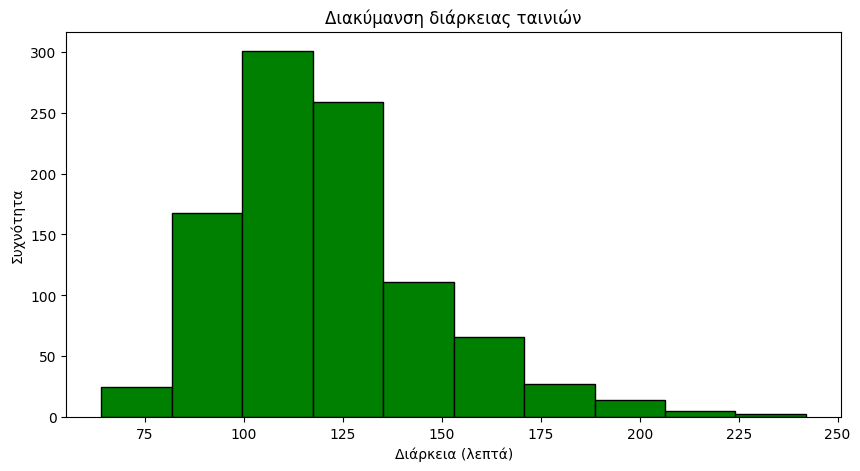

In [ ]:
# δημιουργούμε ένα ιστόγραμμα με τις συχνότητες της διάρκειας των ταινιών, επιλέγοντας έναν αριθμό bins=10

# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 5))
# Στην συνέχεια καλούμε την μέθοδο hist για να δημιουργήσουμε το ιστόγραμμα
plt.hist(df['duration'], bins=10, color='green', edgecolor='black')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια (λεπτά)')
plt.ylabel('Συχνότητα')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

#### **3.2.2 Γράφημα πλαισίου (box plot) για τo duration**

Ένα άλλο είδος γραφήματος για συνεχείς μεταβλητές είναι το boxplot.


Το boxplot βασίζεται στα τεταρτημόρια (quartiles). Στο describe() τα βλέπουμε με τα 25%, 50% και 75%.

In [ ]:
# describe τη στήλη 'duration'

# Στατιστικά περιγραφικά της στήλης duration
df['duration'].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

Στο παραπάνω output του describe() για το duration, βλέπουμε ότι το 25% των ταινιών έχει διάρκεια έως 102 λεπτά, το 50% των ταινιών έχει διάρκεια έως 117 λεπτά και το 75% των ταινιών έχει διάρκεια έως 134 λεπτά. Απ' αυτό προκύπτει ότι η διάμεσος (median), είναι στο 50%, δηλαδή αν κατατάξουμε όλες τις διάρκειες σε αύξουσα σειρά, η μεσαία τιμή είναι τα 117 λεπτά.

Το boxplot μας δείχνει με ένα κουτί τα δύο μεσαία τεταρτημόρια (δηλαδή μέσα σε ποια όρια βρίσκεται το 50% των τιμών του δείγματος), το ανώτατο και το κατώτατο όριο, καθώς και τις ακραίες τιμές (outliers). Το ανώτατο όριο τίθεται μετά το τρίτο τεταρτημόριο (Q3) και σε απόσταση μιάμιση φορά τη διαφορά του Q3-Q1.

![](https://chartio.com/assets/26dba4/tutorials/charts/box-plots/046df50d3e23296f1dda99a385bd54925317c413ffff2a63779ffef0a42b9434/box-plot-construction.png)

**Read more**:
* Περισσότερα για το boxplot μπορείτε να δείτε εδώ: https://chartio.com/learn/charts/box-plot-complete-guide/

Για να σχεδιάσουμε ένα boxplot με την plot() αρκεί να ορίσουμε kind=box.

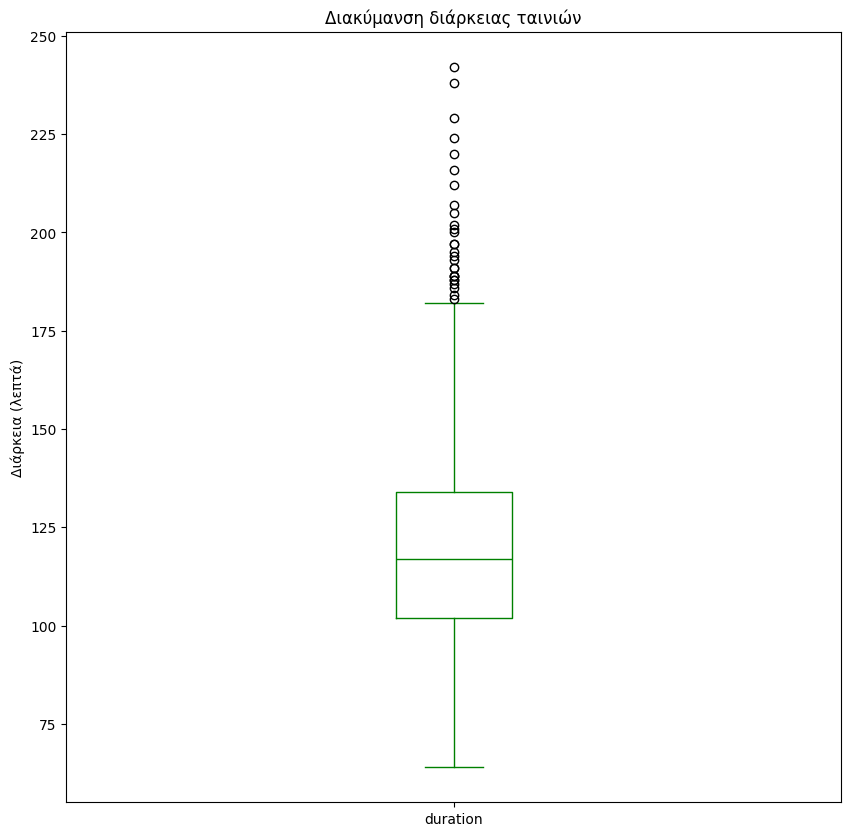

In [ ]:
# boxplot γράφημα για το duration
# Βασιζόμενοι στον παραπάνω οδηγό
# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df['duration'].plot(kind='box', color='green')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση διάρκειας ταινιών')
plt.ylabel('Διάρκεια (λεπτά)')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Παρατηρούμε ότι έτσι το διάγραμμα είναι κατακόρυφο και δεν μας διευκολύνει οπότε θα ορισούμε το διάγραμμα να μην είναι κατακόρυφο

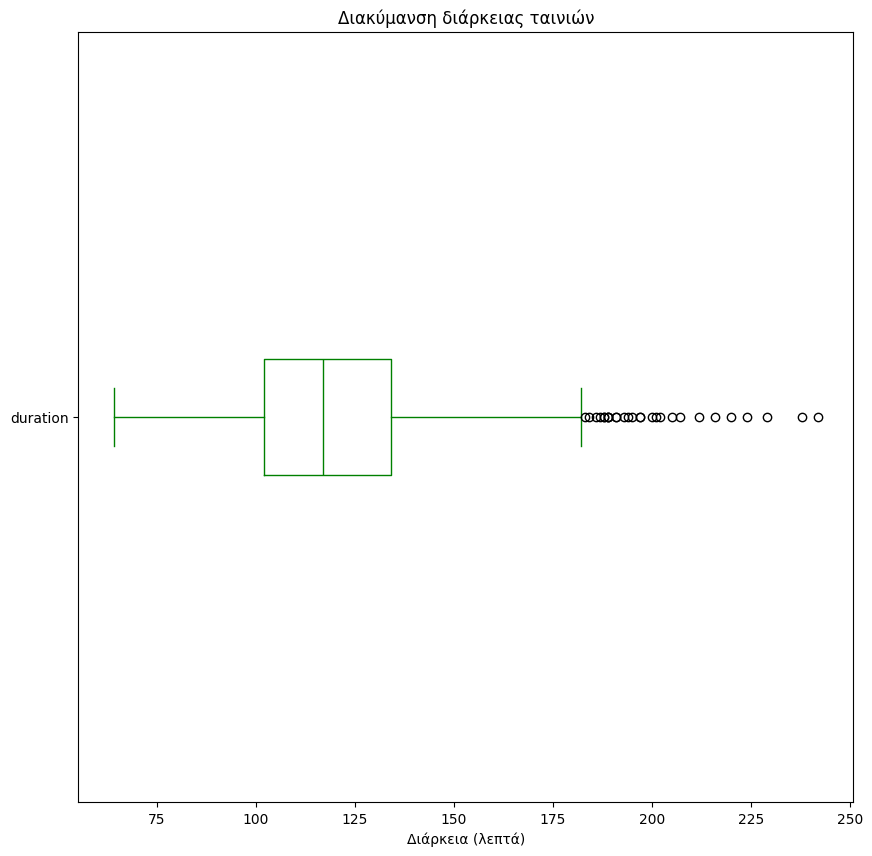

In [ ]:
plt.figure(figsize=(10, 10))
df['duration'].plot(kind='box', color='green', vert=False)
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια (λεπτά)')
plt.show()

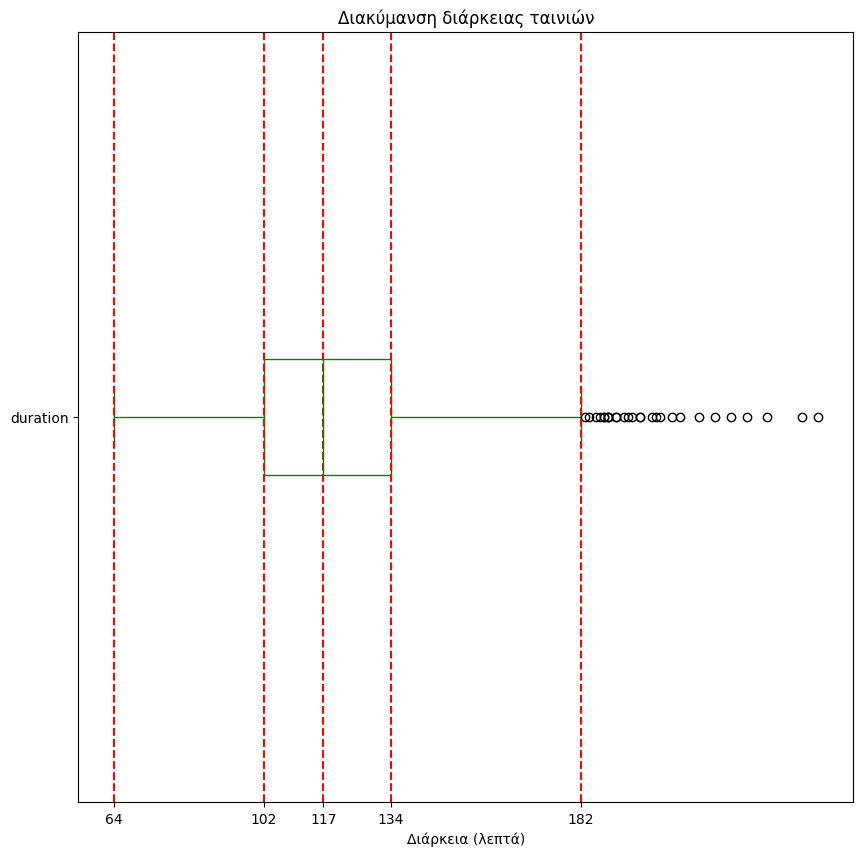

In [ ]:
#in the plot above add vertical lines for x = 102, 134, 64, 182, 117 and also add discrete the numbers on the axis

plt.figure(figsize=(10, 10))
df['duration'].plot(kind='box', color='green', vert=False)
plt.axvline(x=102, color='red', linestyle='--')
plt.axvline(x=134, color='red', linestyle='--')
plt.axvline(x=64, color='red', linestyle='--')
plt.axvline(x=182, color='red', linestyle='--')
plt.axvline(x=117, color='red', linestyle='--')
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια (λεπτά)')
plt.xticks([64, 102, 117, 134, 182], ['64', '102', '117', '134', '182'])
plt.show()

Παράλληλα παραθέτουμε και ένα διαγράμμα με τα αναφερώμενα σημεία για να επαληθεύσουμε ότι ταυτίζονται με τα δεδομένα

Με το boxplot βλέπουμε ότι:

* το 50% των ταινιών του δείγματος έχει διάρκεια από 102 έως 134 λεπτά,
* το κάτω άκρο είναι στο min, δηλαδή στα 64 λεπτά,
* το άνω άκρο είναι στα 182 λεπτά (Q3 + 1.5\*(Q3-Q1) = Q3 + 1.5\*(134-102) = 134 + 1.5\*32 = 182) και
* η διάμεσος είναι στα 117 λεπτά.
* Όλες οι ταινίες με διάρκεια μεγαλύτερη από 182 λεπτά (3 ώρες) είναι outliers.

Τα **outliers** είναι συχνά ένα ωραίο θέμα έρευνας. Έτσι, από την εξέταση των δεδομένων μας προκύπτουν μερικά ενδιαφέροντα ερωτήματα που θα μπορούσαμε να θέσουμε αργότερα:
* Ποιές είναι οι ασυνήθιστα μεγάλης διάρκειας ταινίας μέσα στις 1000 πρώτες του IMDB;
* Ποια είναι τα χαρακτηριστικά τους (content_rating, genre, star_rating);

## **4. Συνέχιση της επισκόπησης, ανάλυσης και οπτικοποίησης των δεδομένων**

### **4.1 Εξέταση του content rating** (ονομαστική μεταβλητή / nominal)

Ξαναβλέπουμε τις μοναδικές τιμές (unique) που παίρνει η μεταβλητή content_rating

In [ ]:
# unique τιμές της στήλης content_rating

# Στην συνέχεια θα δούμε ποιες είναι οι μοναδικές τιμές (unique) που παίρνει η στήλη content_rating
# αξιοποιώντας την μέθοδο unique
print("Οι μοναδικές τιμές της στήλης content_rating είναι:")
print(df['content_rating'].unique())
display(df['content_rating'].unique())


Οι μοναδικές τιμές της στήλης content_rating είναι:
['R' 'PG-13' 'NOT RATED' 'PG' 'UNRATED' 'APPROVED' 'PASSED' 'G' 'X' nan
 'TV-MA' 'GP' 'NC-17']


array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

#### **nan (κενές τιμές)**

Παρατηρούμε ότι στις τιμές υπάρχει και το nan. Το nan σημαίνει ότι η τιμή είναι κενή.

Με τη συνάρτηση isnull(), κοιτάμε να δούμε αν υπάρχουν κενές τιμές και σε άλλες στήλες και πόσες είναι σε κάθε στήλη.

π.χ.
```
df.isnull().sum(axis=0)
```
**εξήγηση του παραπάνω κώδικα**:
* η συνάρτηση isnull() ελέγχει αν υπάρχει nan. Επομένως επιστρέφει τιμές True/False για κάθε κελί
* με το sum() μετά το isnull() ζητάμε το άθροισμα των τιμών True
* με το axis=0 στις παραμέτρους του sum() ορίζουμε ότι η πρόσθεση θα γίνει κατά στήλη (το axis=0 αναφέρεται στις στήλες και το axis=1 στις γραμμές)

In [ ]:
# sum των nan τιμών σε κάθε στήλη
# Στην συνέχεια θα εντοπίσουμε τις κενές τιμές (nan) που περιέχονται στο dataset
# αξιοποιώντας την μέθοδο isnull
print("Ο αριθμός των κενών τιμών σε κάθε στήλη είναι:")
print(df.isnull().sum(axis = 0))
display(df.isnull().sum(axis = 0))

Ο αριθμός των κενών τιμών σε κάθε στήλη είναι:
star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Παρατηρούμε ότι για την στήλη content_rating έχουμε 3 κενές τιμές

**Εντοπισμός των nan**

Ψάχνουμε με firtering να δούμε πού βρίσκονται οι κενές τιμές.

π.χ.
```
df[df['col_name'].isnull()]
```

In [ ]:
# filter dataframe to find rows with nan value in 'content_rating' column
# Τώρα, για να εντοπίσουμε ακριβών που βρίσκονται αυτές οι τρεις κενές τιμές
# θα χρησιμοποιήσουμε την μέθοδο df[df['content_rating'].isnull()]
print("Οι ταινίες που έχουν κενές τιμές στην στήλη content_rating είναι:")
print(df[df['content_rating'].isnull()])
display(df[df['content_rating'].isnull()])

Οι ταινίες που έχουν κενές τιμές στην στήλη content_rating είναι:
     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Επαληθεύουμε ότι υπάρχουν μόνο 3 κενές τιμές και συγκεκριμένα έχουμε:

Στην θέση 187, την ταινία με τίτλο "Butch Cassidy and the Sundance Kid"
Στην θέση 649, την ταινία με τίτλο "Where Eagles Dare"
Στην θέση 936, την ταινία με τίτλο "True Grit"

Αν έχουμε τη δυνατότητα να βρούμε τις τιμές που λείπουν, πηγαίνουμε στις πηγές. Στη συγκεκριμένη περίπτωση, πάμε στο IMDB και βρίσκουμε το content_rating για τις συγκεκριμένες ταινίες.

Στη συνέχεια, εισάγουμε τις τιμές που βρήκαμε στο dataframe στα αντίστοιχα κελιά. Η επιλογή (selection) των κελιών γίνεται με τo loc.

π.χ.

```
df.loc[[index_num1, index_num2],'col_name'] = 'value'
df.loc[one_index_number,'col_name'] = 'value'
```


In [ ]:
# assign content_rating values to cells with nan
# content rating ταινίας 187 = "PG"
# content rating ταινίας 649 = "PG"
# content rating ταινίας 936 = "15" or "PG-13"

# Στην συνέχεια θα δώσουμε τιμές στις κενές τιμές της στήλης content_rating
# σύμφωνα με τις παραπάνω πληροφορίες που λάβαμε από το IMDB

df.loc[187, 'content_rating'] = 'PG'
df.loc[649, 'content_rating'] = 'PG'
df.loc[936, 'content_rating'] = 'PG-13'

# Στην συνέχεια θα ελέγξουμε αν οι κενές τιμές της στήλης content_rating
# έχουν συμπληρωθεί με τις παραπάνω τιμές
print("Ο αριθμός των κενών τιμών σε κάθε στήλη είναι:")
print(df.isnull().sum(axis = 0))
display(df.isnull().sum(axis = 0))




Ο αριθμός των κενών τιμών σε κάθε στήλη είναι:
star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [ ]:
# ελέγχουμε την υλοποίηση των αλλαγών
# e.g. df.loc[[index_num1, index_num2, ...], 'col_name']

# Έλεγχος αλλαγών
df['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', 'TV-MA', 'GP', 'NC-17'], dtype=object)

**Μείωση των κατηγοριών για ακατάλληλο περιεχόμενο (adult content)**

Από τις μοναδικές τιμές της στήλης content_rating, παρατηρούμε ότι στις τιμές υπάρχουν τα NC-17, X και TV-MA. Και οι 3 αυτοί χαρακτηρισμοί αφορούν περιεχόμενο κατάλληλο μόνο για ενήλικες άνω των 17.

Επομένως, μπορούμε με replace να αντικαταστήσουμε τα Χ και TV-MA με το ΝC-17, και να έχουμε για όλες τις ταινίες ενηλίκων τη σήμανση NC-17.

**Note**: για να εγγραφεί η αλλαγή στο dataframe πρέπει να την αποθηκεύσουμε, δηλαδή να ορίσουμε ότι η στήλη content_rating θα είναι η στήλη content_rating **με** την αλλαγή.

π.χ.
```
df['col_name'] = df['col_name'].replace(['old_val1','old_val2'], 'new_value')
```


In [ ]:
# replace 'X' and 'TV-MA' with 'NC-17'
df['content_rating'] = df['content_rating'].replace({'X': 'NC-17', 'TV-MA': 'NC-17'})

In [ ]:
# ελέγχουμε την υλοποίηση των αλλαγών (θα πρέπει στα unique του content rating να μην υπάρχουν πλέον τα X και TV-MA)

df['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'NC-17', 'GP'], dtype=object)

#### **Καταμέτρηση του πλήθους των ταινιών σε κάθε κατηγορία περιεχομένου**

Όπως έχουμε δει, μπορούμε να κάνουμε ομαδοποίηση των τιμών και να βρούμε τις συχνότητές τους (count).

Αυτό θα κάνουμε κι εδώ για το content rating: ομαδοποίηση (groupby με as_index=False) ως προς το content_rating, καταμέτρηση (count) των τίτλων των ταινιών σε κάθε ομάδα και ταξινόμηση του αποτελέσματος σε φθίνουσα σειρά.

In [ ]:
# Πλήθος ταινιών σε κάθε κατηγορία περιεχομένου
rating_counts = df['content_rating'].value_counts()
rating_counts

print("Complete number of movies in all categories:")
print(df['content_rating'].shape[0])
print("Number of movies in each category:")
print(rating_counts)
display(rating_counts)

Complete number of movies in all categories:
979
Number of movies in each category:
content_rating
R            460
PG-13        190
PG           125
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: count, dtype: int64


content_rating
R            460
PG-13        190
PG           125
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: count, dtype: int64

**Γραφήματα**

Οπτικοποιούμε την ομαδοποίηση με ένα bar chart.

Για να ομορφύνει το γράφημα μπορούμε να προσθέσουμε έναν τίτλο καθώς και τίτλους στους άξονες x και y:
* Για τον τίτλο του γραφήματος προσθέτουμε μέσα στην παρένθεση του plot: title='Content Rating Visualization'
* Για τα labels στους άξονες x και y προσθέτουμε κάτω από την εντολή του plot στο ίδιο code cell:
```
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
```

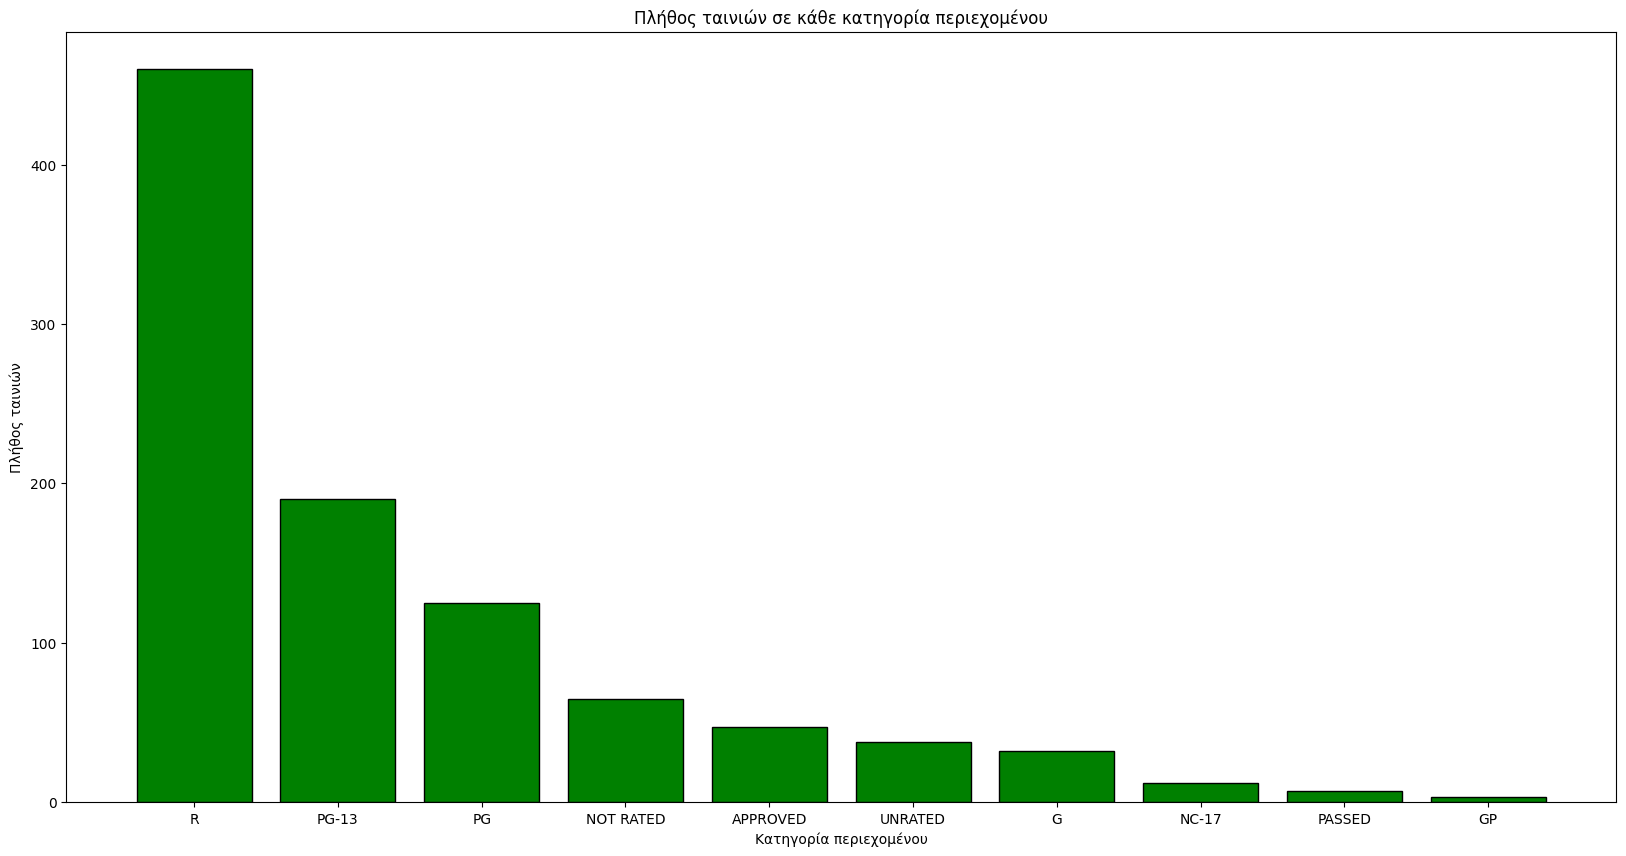

In [ ]:
# create bar chart
# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(20, 10))
# Στην συνέχεια καλούμε την μέθοδο bar για να δημιουργήσουμε το γράφημα
plt.bar(rating_counts.index, rating_counts.values, color='green', edgecolor='black')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Πλήθος ταινιών σε κάθε κατηγορία περιεχομένου')
plt.xlabel('Κατηγορία περιεχομένου')
plt.ylabel('Πλήθος ταινιών')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Βλέπουμε το γράφημα και εξετάζουμε αν είναι ακόμα καλύτερο με οριζόντιο barchart. Το ξαναφτιάχνουμε από κάτω για να τα συγκρίνουμε.

**Note**: Προσέχουμε αν είναι σωστή η ταξινόμηση (τα περισσότερα counts να είναι στην κορυφή) και τα labels των αξόνων x και y

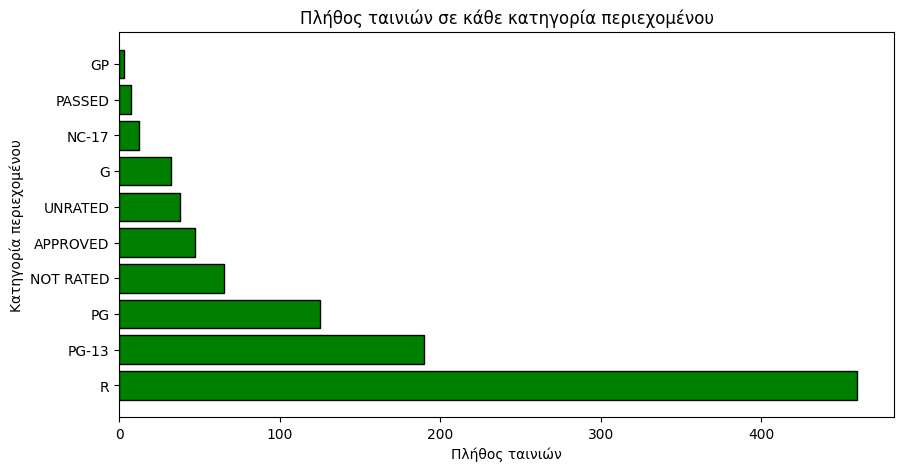

In [ ]:
# create horizontal bar chart
# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 5))
# Στην συνέχεια καλούμε την μέθοδο bar για να δημιουργήσουμε το γράφημα
plt.barh(rating_counts.index, rating_counts.values, color='green', edgecolor='black')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Πλήθος ταινιών σε κάθε κατηγορία περιεχομένου')
plt.xlabel('Πλήθος ταινιών')
plt.ylabel('Κατηγορία περιεχομένου')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

### **4.2 Εξέταση με συγκρίσεις**

#### **Υπάρχει συσχέτιση της βαθμολογίας των ταινιών (star_rating) με τη διάρκεια των ταινιών (duration);**

Βλέπουμε τα στατιστικά στοιχεία για τη διάρκεια των ταινιών (duration) ανά βαθμολογία (star_rating) με ένα boxplot.

π.χ.
```
df.plot[kind='', column='', by='')
```

<Figure size 1000x1000 with 0 Axes>

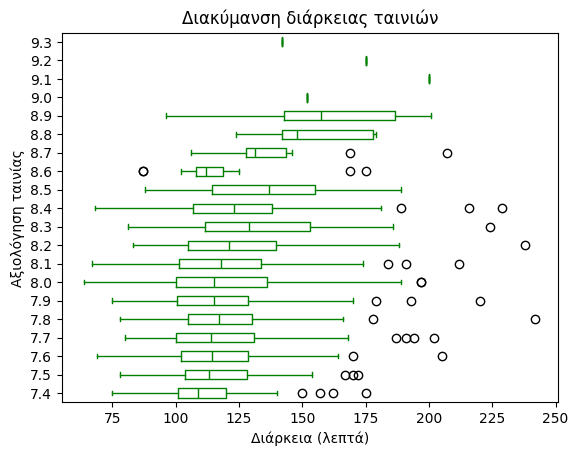

In [ ]:
# Σχεδιασμός γραφήματος με την μέθοδο boxplot
# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df.plot(kind='box', color='green', vert=False, column = 'duration', by = 'star_rating')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια (λεπτά)')
plt.ylabel('Αξιολόγηση ταινίας')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Παρατηρώντας το γράφημα βλέπουμε ότι:
* ταινίες με βαθμολογία 8.9 έχουν μεγαλύτερη διάρκεια
* καμία ταινία με διάρκεια μεγαλύτερη από 215 λεπτά δεν έχει βαθμολογία πάνω από 8.4
* υπάρχει μόνο μία ταινία για κάθε βαθμολογία από 9 και πάνω (συνολικά 4 ταινίες)

Βρίσκουμε τα ακριβή στατιστικά στοιχεία για τις ταινίες με βαθμολογία 8.9, με conditional filtering (η τιμή της στήλης star_rating να είναι ίση με 8.9) και describe().

π.χ.
```
df[df['col_name'] == value].describe()
```


In [ ]:
# stats for star_rating
# Στατιστικά περιγραφικά της στήλης star_rating
df['star_rating'].describe()

count    979.000000
mean       7.889785
std        0.336069
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        9.300000
Name: star_rating, dtype: float64

Επίσης με filtering, βρίσκουμε και ποιες είναι αυτές οι ταινίες (με star_rating ίσο με 8.9).

In [ ]:
# Ταινίες με βαθμολογία 8.9

#το πλήθος των ταινιών με βαθμολογία 8.9
print("Ο αριθμός των ταινιών με βαθμολογία 8.9 είναι:")
print(df[df['star_rating'] == 8.9].shape[0])

df[df['star_rating'] == 8.9]

Ο αριθμός των ταινιών με βαθμολογία 8.9 είναι:
6


,star_rating,title,content_rating,genre,duration,actors_list
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


### **4.3 Καλύτερη ταινία ανά είδος**

Μπορούμε να βρούμε την ταινία με την ψηλότερη βαθμολογία (star_rating) σε κάθε είδος (genre) με τη χρήση των sort_values, groupby και το keyword first():

π.χ.

```
df.sort_values('col_name_for_sorting', ascending=False).groupby('col_name_for_grouping', as_index=False)[['title','star_rating']].first()
```

**Εξήγηση του παραπάνω κώδικα**:

* df.sort_values('col_name_for_sorting', ascending=False): ταξινομούμε το dataframe σε φθίνουσα σειρά ως προς την επιθυμητή στήλη
* groupby('col_name_for_grouping', as_index=False): ομαδοποιούμε τα δεδομένα στη βάση των τιμών της επιθυμητής στήλης - με το index=False ζητάμε να μη γίνουν index του dataframe που θα προκύψει τα ονόματα των ομάδων που θα φτιάξει το groupby
* [['title','star_rating']]: oρίζουμε τις στήλες που θα έχει το dataframe που θα προκύψει
* first(): ζητάμε την πρώτη εγγραφή σε κάθε ομάδα (στη βάση της φθίνουσας σειράς που έφτιαξε το sort_values) [*με το last() θα παίρναμε την τελευταία εγγραφή*]

In [ ]:
# top star rated movie in every genre

# Για να εντοπίσουμε την ταινία με την καλύτερη βαθμολογία σε κάθε κατηγορία
# θα χρησιμοποιήσουμε τα παρακάτω βήματα

# 1. df.sort_values('star_rating')
# 2. df.groupby('genre', as_index=False)
# 3. [['title', 'star_rating']].first()

# Άρα η εντολή που θα χρησιμοποιήσουμε είναι:

top_star_rated_movies = df.sort_values('star_rating').groupby('genre', as_index=False)[['title', 'star_rating']].first()
print("Η ταινία με την καλύτερη βαθμολογία σε κάθε κατηγορία είναι:")
print(top_star_rated_movies)
display(top_star_rated_movies)


Η ταινία με την καλύτερη βαθμολογία σε κάθε κατηγορία είναι:
        genre                                            title  star_rating
0      Action  Master and Commander: The Far Side of the World          7.4
1   Adventure                      Back to the Future Part III          7.4
2   Animation                              Alice in Wonderland          7.4
3   Biography                                  Man on the Moon          7.4
4      Comedy                                          Tootsie          7.4
5       Crime                                      Wall Street          7.4
6       Drama                            The Cider House Rules          7.4
7      Family              Willy Wonka & the Chocolate Factory          7.8
8     Fantasy                        The City of Lost Children          7.7
9   Film-Noir                                       Spellbound          7.7
10    History                              Battleship Potemkin          8.0
11     Horror              

,genre,title,star_rating
0,Action,Master and Commander: The Far Side of the World,7.4
1,Adventure,Back to the Future Part III,7.4
2,Animation,Alice in Wonderland,7.4
3,Biography,Man on the Moon,7.4
4,Comedy,Tootsie,7.4
5,Crime,Wall Street,7.4
6,Drama,The Cider House Rules,7.4
7,Family,Willy Wonka & the Chocolate Factory,7.8
8,Fantasy,The City of Lost Children,7.7
9,Film-Noir,Spellbound,7.7


## **5. Περαιτέρω αναζητήσεις, αναλύσεις και οπτικοποιήσεις των δεδομένων**

Συνεχίστε τη ίδια διαδικασία για να θέσετε περαιτέρω ερωτήματα στα δεδομένα και να πάρετε περισσότερες απαντήσεις.

Μερικά ενδεικτικά ερωτήματα:
* υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του είδους των ταινιών (genre);
* σχετίζεται η βαθμολογία (star_rating) με τον χαρακτηρισμό περιεχομένου (content_rating);
* ποιος είναι ο μ.o. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre);
* σχετίζεται η διάρκεια (duration) με το είδος (genre);

<Figure size 1000x1000 with 0 Axes>

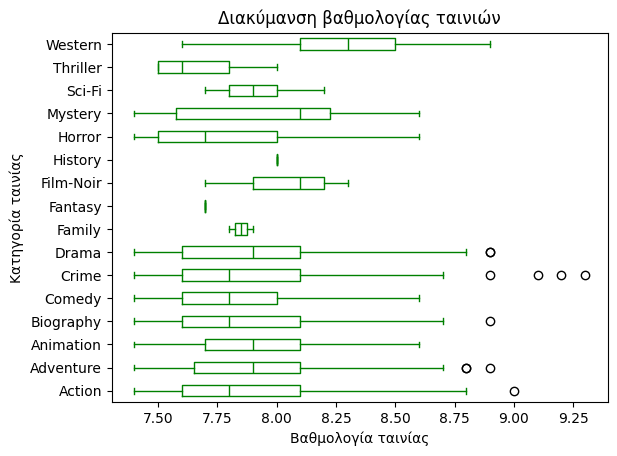

In [ ]:
#υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του είδους των ταινιών (genre);

# Για να δούμε αν υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του είδους των ταινιών (genre)
# θα χρησιμοποιήσουμε την μέθοδο boxplot

# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df.plot(kind='box', color='green', vert=False, column = 'star_rating', by = 'genre')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση βαθμολογίας ταινιών')
plt.xlabel('Βαθμολογία ταινίας')
plt.ylabel('Κατηγορία ταινίας')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()



Παρατηρώντας το boxplot βλέπουμε ότι:

Τα είδη Film-Noir, Western και History συγκεντρώνουν τις υψηλότερες διάμεσες βαθμολογίες (λίγο πάνω από 8.0)· οι περισσότερες ταινίες τους βρίσκονται στο ανώτερο τμήμα της κλίμακας.

Στα Thriller, Fantasy και Family οι διάμεσες κυμαίνονται χαμηλότερα (≈ 7.7 – 7.9) και το IQR είναι στενό, γεγονός που δείχνει μικρή διασπορά – τα περισσότερα έργα εκεί βαθμολογούνται παρόμοια.

Τα είδη Action, Adventure, Animation, Biography, Comedy και Crime εμφανίζουν μεμονωμένους ακραίους βαθμούς (> 9.0) – πρόκειται για λίγες ταινίες που ξεχωρίζουν μέσα στο είδος τους.

Το Western και το Mystery έχουν τα μεγαλύτερα whiskers, συνεπώς παρουσιάζουν και τη μεγαλύτερη εσωτερική διαφοροποίηση ποιότητας.

Συνολικά, το εύρος 7.4 – 9.3 καλύπτεται σχεδόν από όλα τα είδη· άρα το genre φαίνεται να επηρεάζει αλλά δεν καθορίζει απόλυτα τη βαθμολογία.

In [ ]:
# Παράλληλα αν θέλαμε και στατιστικά περιγραφικά της στήλης star_rating συναρτημένα με το genre

# Στατιστικά περιγραφικά της στήλης star_rating
df.groupby('genre', as_index=False)['star_rating'].describe()
print("Στατιστικά περιγραφικά της στήλης star_rating συναρτημένα με το genre είναι:")
# print(df.groupby('genre', as_index=False)['star_rating'].describe())
display(df.groupby('genre', as_index=False)['star_rating'].describe())

Στατιστικά περιγραφικά της στήλης star_rating συναρτημένα με το genre είναι:


,genre,count,mean,std,min,25%,50%,75%,max
0,Action,136.0,7.884559,0.333084,7.4,7.600,7.80,8.100,9.0
1,Adventure,75.0,7.933333,0.361802,7.4,7.650,7.90,8.100,8.9
2,Animation,62.0,7.914516,0.292444,7.4,7.700,7.90,8.100,8.6
3,Biography,77.0,7.862338,0.310364,7.4,7.600,7.80,8.100,8.9
4,Comedy,156.0,7.822436,0.304922,7.4,7.600,7.80,8.000,8.6
5,Crime,124.0,7.916935,0.392143,7.4,7.600,7.80,8.100,9.3
6,Drama,278.0,7.902518,0.328041,7.4,7.600,7.90,8.100,8.9
7,Family,2.0,7.850000,0.070711,7.8,7.825,7.85,7.875,7.9
8,Fantasy,1.0,7.700000,NaN,7.7,7.700,7.70,7.700,7.7
9,Film-Noir,3.0,8.033333,0.305505,7.7,7.900,8.10,8.200,8.3


<Figure size 1000x1000 with 0 Axes>

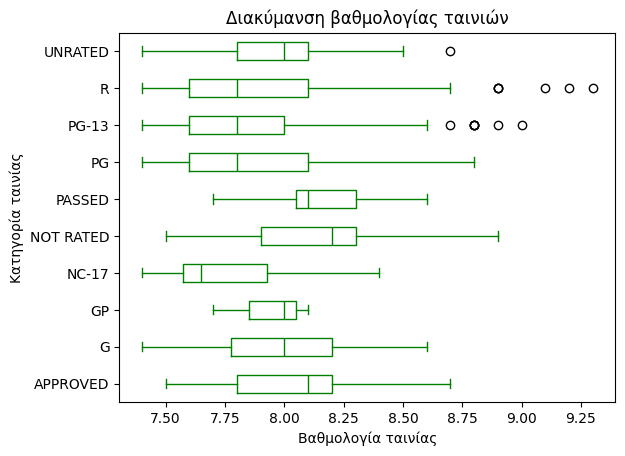

In [ ]:
# σχετίζεται η βαθμολογία (star_rating) με τον χαρακτηρισμό περιεχομένου (content_rating);

# Για να δούμε αν υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του χαρακτηρισμού περιεχομένου (content_rating)
# θα χρησιμοποιήσουμε την μέθοδο boxplot
# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df.plot(kind='box', color='green', vert=False, column = 'star_rating', by = 'content_rating')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση βαθμολογίας ταινιών')
plt.xlabel('Βαθμολογία ταινίας')
plt.ylabel('Κατηγορία ταινίας')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Παρατηρώντας το boxplot διαπιστώνουμε ότι:

Όλες οι κατηγορίες περιεχομένου κινούνται σχεδόν στο ίδιο κεντρικό εύρος — η διάμεση βαθμολογία βρίσκεται γύρω από 8.0.
Άρα, η κατάταξη περιεχομένου δεν φαίνεται να «ανεβάζει» ή να «ρίχνει» δραματικά τις μέσες τιμές.

Οι κατηγορίες UNRATED, R και PG-13 διαθέτουν τα περισσότερα (και υψηλότερα) ακραία σημεία > 9.0 ★, κάτι που δείχνει πως οι κορυφαίες βαθμολογίες προέρχονται κυρίως από ταινίες με πιο «ώριμο» κοινό ή χωρίς επίσημη βαθμολόγηση.

Το NOT RATED εμφανίζει το μεγαλύτερο εύρος (whiskers ≈ 7.4 – 8.8), υποδηλώνοντας μεγάλη εσωτερική ποικιλία ποιότητας.

Κατηγορίες με περιορισμένα δείγματα, όπως NC-17 και GP, παρουσιάζουν μικρό IQR· οι λίγες ταινίες τους τείνουν να συγκεντρώνονται κάτω από τον γενικό μέσο όρο.

Συνολικά, το εύρος 7.4 – 8.8 καλύπτει σχεδόν όλες τις κατηγορίες, άρα ο χαρακτηρισμός περιεχομένου επηρεάζει ελαφρά αλλά δεν καθορίζει τη βαθμολογία.

In [ ]:
# ποιος είναι ο μ.o. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre);

# Για να δούμε ποιος είναι ο μ.ο. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre)
# θα χρησιμοποιήσουμε την μέθοδο groupby και την μέθοδο mean

average_duration = round(df.groupby('genre', as_index=False)['duration'].mean())
print("Ο μ.ο. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre) είναι:")
# print(average_duration)
display(average_duration)

Ο μ.ο. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre) είναι:


,genre,duration
0,Action,126.0
1,Adventure,135.0
2,Animation,97.0
3,Biography,132.0
4,Comedy,108.0
5,Crime,122.0
6,Drama,127.0
7,Family,108.0
8,Fantasy,112.0
9,Film-Noir,97.0


<Figure size 1000x1000 with 0 Axes>

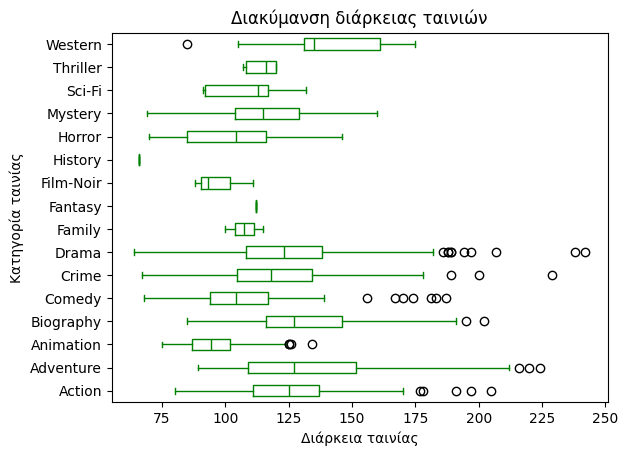

In [ ]:
# παρόμοια αναπαράσταση με την μέθοδο boxplot

# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df.plot(kind='box', color='green', vert=False, column = 'duration', by = 'genre')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια ταινίας')
plt.ylabel('Κατηγορία ταινίας')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Παρατηρούμε ότι το boxplot ταιριάζει με την παραπάνω λίστα

<Figure size 1000x1000 with 0 Axes>

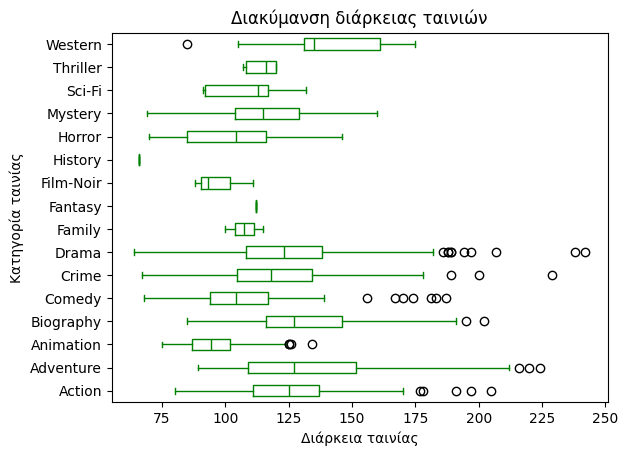

In [ ]:
# σχετίζεται η διάρκεια (duration) με το είδος (genre);

# Για να δούμε αν υπάρχει σχέση μεταξύ της διάρκειας των ταινιών (duration) και του είδους των ταινιών (genre)
# θα χρησιμοποιήσουμε την μέθοδο boxplot

# Αρχίζουμε αρχικοποιώντας το σχήμα του γραφήματος
plt.figure(figsize=(10, 10))
# Στην συνέχεια ορίζουμε το είδος του γραφήματος να είναι boxplot
df.plot(kind='box', color='green', vert=False, column = 'duration', by = 'genre')
# Στην συνέχεια προσθέτουμε τίτλο και ετικέτες στους άξονες
plt.title('Διακύμανση διάρκειας ταινιών')
plt.xlabel('Διάρκεια ταινίας')
plt.ylabel('Κατηγορία ταινίας')
# Τέλος καλούμε την μέθοδο show για να εμφανίσουμε το γράφημα
plt.show()

Παρατηρώντας το boxplot βλέπουμε ότι:

Adventure, Western, Drama και Biography έχουν τις μεγαλύτερες διάμεσες διάρκειες περίπου 135 λεπτά και εκτεταμένα whiskers.

Αντιθέτως, οι κατηγορίες Animation, Film-Noir, Thriller και Fantasy κινούνται χαμηλότερα με διακύμανση περίπου 100 λεπτά με μικρό IQR, κάτι που δείχνει ότι οι περισσότερες είναι σύντομες και σχετικά ομοιογενείς στο μήκος.

Τα Action και Crime παρουσιάζουν μεγάλη διασπορά, διαρκούν περίπου 120 λεπτά και εμφανίζουν και αρκετές περιπτώσεις που διαρκούν 190–240 λεπτά.

Οι τιμές > 200 λεπτών προέρχονται σχεδόν αποκλειστικά από Action, Adventure και Drama· στις υπόλοιπες κατηγορίες τα upper whiskers σπάνια ξεπερνούν τα 175 λεπτά.

Το είδος History φαίνεται να αντιπροσωπεύεται από ελάχιστα δείγματα στο συγκεκριμένο dataset γι’ αυτό το κουτί είναι συμπιεσμένο σε μία τιμή γύρω στα 70–80 λεπτά.

Συνολικά, το εύρος 90 – 175 λεπτά καλύπτει τις βασικές μάζες όλων των ειδών, ωστόσο ορισμένες κατηγορίες έχουν μεγαλύτερες διάρκειες.

Άρα η κατηγορία σχετίζεται με τη διάρκεια.